# Computational Graphs and Derivatives

In a typical machine learning problem, for example in a supervised objective, we have a dataset with an input and an output (or label) values. The main idea of such a problem is that to find a function that generates output values from given input values. There are many different methods for finding or predicting this function. In this case, the ANN will be used. When the data is huge and the model is complex one should choose to estimate the solution rather than the exact solution. In order to estimate a function for a given dataset, first of all, we predict an output with previous step's (or initial) model parameters. Then we define a distance metric, which measures the distance between the predicted output and the actual output, to calculate the error. The main purpose of these problems is to reduce the error during training. By reducing error, the parameters can be learned in such a way that they can find the approximate solution to the desired outputs.

\begin{align}
E(\theta) &= D(y||y')\\
y' &= F(\theta)
\end{align}

Gradient descent (or stochastic gradient descent method) is one of the most popular methods for the minimization of the objective function. The derivative of the objective function with respect to the variable to be updated is calculated. The derivative indicates the rate of change. The variable is updated in the opposite direction of the gradient with a ratio, learning rate $\eta$, of the magnitude of the gradient. This method can be used in any continuous, differentiable objective function. 

\begin{align}
\theta^{n+1} &= \theta^{n} - \eta \triangledown_{\theta}E(\theta_n)
\end{align}

On the other hand, backpropagation is a method to implement gradient descent efficiently in artificial neural network models. The idea is to calculate the network in the forward direction, calculate and store middle values of the network and then get the error value of the loss or objective function. This is called the forward pass. In backward pass, the gradient of the middle parts, that is partial derivatives, are calculated with the stored values. So that, the gradient of the desired variables can be computed and updated accordingly. The chain rule is the main component while performing backpropagation. 

Auto-differentiation via computational graphs are another way of implementing gradient descent. In this method, the loss function is represented as a graph, namely computational graph. In this graph, the nodes represent variables, constants, functions, and operators. 

### A Simple Example for a Computational Graph
A simple example for a computational graph for the function 
\begin{align}
d=a+bc
\end{align}
in two different packeges is as follows: 

In [2]:
import tensorflow as tf

g = tf.Graph()

with g.as_default():
    a = tf.placeholder(tf.float32, name="a")
    b = tf.placeholder(tf.float32, name="b")
    c = tf.constant(4.3,name="c")
    d = a + b*c

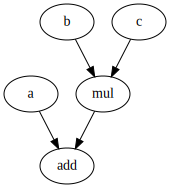

In [5]:
from graphviz import Digraph
dot = Digraph()

for n in g.as_graph_def().node:
    # Each node has a name and a label. The name identifies the node
    # while the label is what will be displayed in the graph.
    # We're using the name as a label for simplicity.
    dot.node(n.name, label=n.name)
    
    for i in n.input:
        # Edges are determined by the names of the nodes
        dot.edge(i, n.name)
        
# Jupyter can automatically display the DOT graph,
# which allows us to just return it as a value.
dot

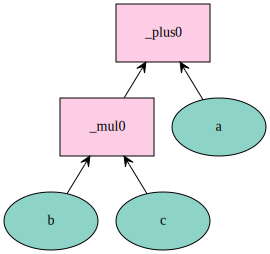

In [7]:
import mxnet as mx
a = mx.symbol.Variable('a')
b = mx.symbol.Variable('b')
c = mx.symbol.Variable('c')

# Set dummy dimensions
k = 64
max_user = 100
max_item = 50

# user feature lookup
#user = mx.symbol.Embedding(data = user, input_dim = max_user, output_dim = k)

# item feature lookup
#item = mx.symbol.Embedding(data = item, input_dim = max_item, output_dim = k)

# predict by the inner product, which is elementwise product and then sum
net = b * c
net = net + a
#net = mx.symbol.sum_axis(data = net, axis = 1)
#net = mx.symbol.Flatten(data = net)

# loss layer
#net = mx.symbol.LinearRegressionOutput(data = net, label = score)

# Visualize your network
mx.viz.plot_network(net)

In these graphs, the operator nodes represent also the output of that operator. Partial derivatives can be placed on the edges. That is the edge from $a$ to $plus$ nodes can be considered as the partial derivative of the addition function with respect to the variable $a$, that is $\frac{\partial d}{\partial a}$. 

Similarly, we have $\frac{\partial mul}{\partial c}$, $\frac{\partial mul}{\partial b}$, $\frac{\partial plus}{\partial mul}$. 

In this simple example, suppose we want to calculate the partial derivative of this function with respect to $b$. The only thing we do is to multiply the partial derivatives along the path from $b$ to $plus$. That is, 

\begin{align*}
\frac{\partial add}{\partial b} = \frac{\partial mul}{\partial b}*\frac{\partial plus}{\partial mul}
\end{align*}

This method can be applied more complex functions easily, especially more deep structures as Deep Networks. 

### Neural Network Example
In the second example, the computational graph of the mean squared error objective function of a two-layered neural network is given. W0 and W1 are the weights of the first and second hidden layer respectively. For simplicity activation function is not used, only affine transformations are used. The dimensions of the input and hidden layers are omitted. 

\begin{align}
E &= \frac{1}{2}(Y'-Y)^2 \\
Y' &= W1(W0*X)
\end{align}

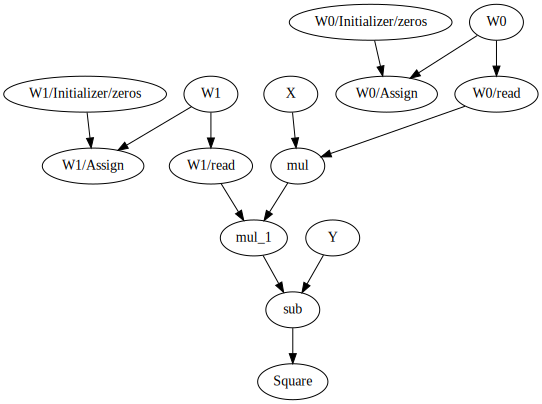

In [8]:
g2 = tf.Graph()

with g2.as_default():
    x = tf.placeholder(tf.float32, name="X")
    y = tf.placeholder(tf.float32, name="Y")
    W0 = tf.get_variable("W0", shape=(), initializer=tf.zeros_initializer())
    W1 = tf.get_variable("W1", shape=(), initializer=tf.zeros_initializer())
    Y_h = tf.square((x*W0)*W1-y)
    

dot2 = Digraph()

for n in g2.as_graph_def().node:
    # Each node has a name and a label. The name identifies the node
    # while the label is what will be displayed in the graph.
    # We're using the name as a label for simplicity.
    dot2.node(n.name, label=n.name)
    
    for i in n.input:
        # Edges are determined by the names of the nodes
        dot2.edge(i, n.name)
        
# Jupyter can automatically display the DOT graph,
# which allows us to just return it as a value.
dot2

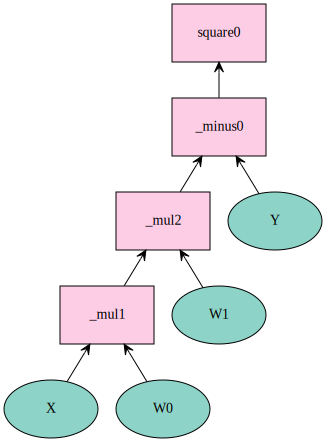

In [9]:
x = mx.symbol.Variable('X')
y = mx.symbol.Variable('Y')
W0 = mx.symbol.Variable('W0')
W1 = mx.symbol.Variable('W1')

# Set dummy dimensions
k = 64
max_user = 100
max_item = 50

# predict by the inner product, which is elementwise product and then sum
net = x*W0
net = net*W1
net = mx.symbol.square((net-y))


# Visualize your network
mx.viz.plot_network(net)

So when we look at the computational graph, the gradient of $W0$ can be computed easily. 

\begin{align}
&\frac{\partial square}{\partial W0} = \frac{\partial mul_1}{\partial W0}*\frac{\partial mul_2}{\partial mul_1}*\frac{\partial minus_1}{\partial mul_2}*\frac{\partial square_0}{\partial minus_1} \\
&\frac{\partial square}{\partial W0} = X * W1 * 1 * (Y'-Y)
\end{align}

## Partial Computational Graph of a Multilayer ANN

Below is a part of the computational graph of a multilayer ANN. Thick red lines are indicators of the path of the update of variable $w_{t,t}^k$. 

\begin{align}
w_{i,j}^k &: \text{The weigth of layer $k$ between nodes $i$ and $j$} \\
a_t^{k}  &= \sum_j o_j^{k-1}w_{j,t}^k  \\
o_t^k &= G(a_t^{k}) \\
G(.) &: \text{Activation Function for that layer}
\end{align}



<img src="out.jpeg" width="1000">  

Below is the simplified version of the above graph. Just the related nodes are taken into consideration while updating $w_{t,t}^k$

<img src="out2.jpeg" width="600">  